In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc

In [3]:
nakagami = pd.read_csv("6. Распределение_Накагами_var_6.csv", header=None).squeeze().tolist()

In [4]:
def summation(sample):
    """сумма элементов выборки"""
    summation = 0
    for value in sample:
        summation += value
    return summation

def average(sample):
    """выборочное среднее"""
    return summation(sample) / len(sample) if len(sample) > 0 else 0

def median(sample):
    """медиана"""
    n = len(nakagami)
    sorted_sample = sorted(sample)
    if n % 2 == 1:
        return sorted_sample[n // 2]
    else:
        return (sorted_sample[n // 2 - 1] + sorted_sample[n // 2]) / 2

def mode(sample):
    """мода"""
    frequency = {}
    for value in sample:
        if value in frequency:
            frequency[value] += 1
        else:
            frequency[value] = 1
    max_frequency = max(frequency.values())
    mode = [key for key, val in frequency.items() if val == max_frequency]
    return mode if len(mode) == 1 else mode

def range(sample):
    """размах выборки"""
    return max(sample) - min(sample)

def biased_variance(sample):
    """смещенная дисперсия"""
    avrg = average(sample)
    return sum((x - avrg) ** 2 for x in sample) / len(sample)

def unbiased_variance(sample):
    """несмещенная дисперсия"""
    avrg = average(sample)
    return sum((x - avrg) ** 2 for x in sample) / (len(sample) - 1)

def initial_moment(nakagami, k):
    """выборочный начальный момент k-ого порядка"""
    return sum(x ** k for x in nakagami) / len(nakagami)

def central_moment(sample, k):
    """выборочный центральный момент k-го порядка"""
    avrg = average(sample)
    return sum((x - avrg) ** k for x in sample) / len(sample)

In [5]:
def build_edf(sample, size):
    """построение эмпирической функции распределения для подвыборки из size элементов"""
    values = np.random.choice(sample, size=size)
    data_sorted = np.sort(values)

    # Вычисляем значения ЭФР в точках, соответствующих отсортированным данным
    n = len(data_sorted)
    y_values = np.arange(1, n + 1) / n

    # Визуализация эмпирической функции распределения
    plt.step(data_sorted, y_values, where='post', label='ЭФР')
    plt.title(f'График эмпирической функции для подвыборки из {size} элементов')
    plt.xlabel('x')
    plt.ylabel('Fn(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

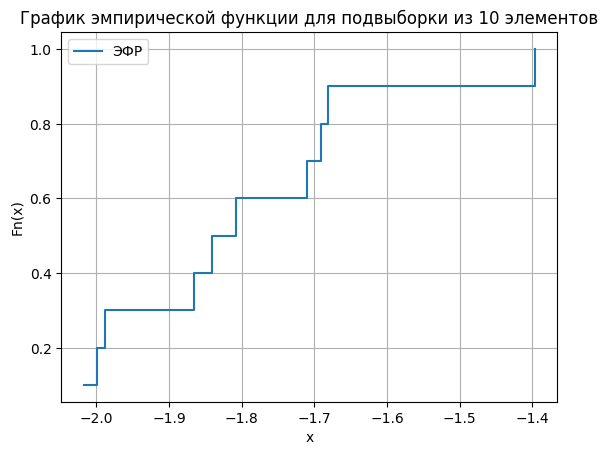

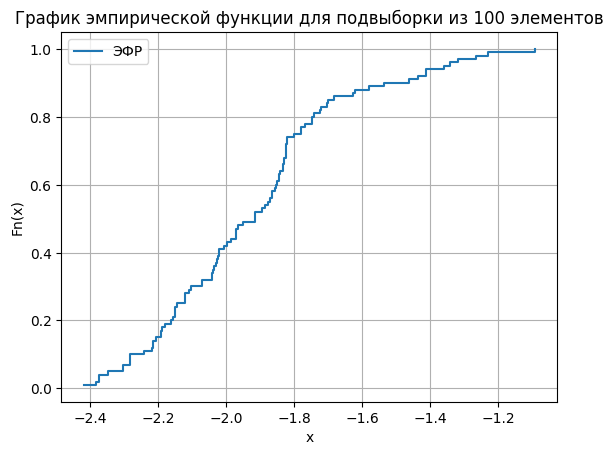

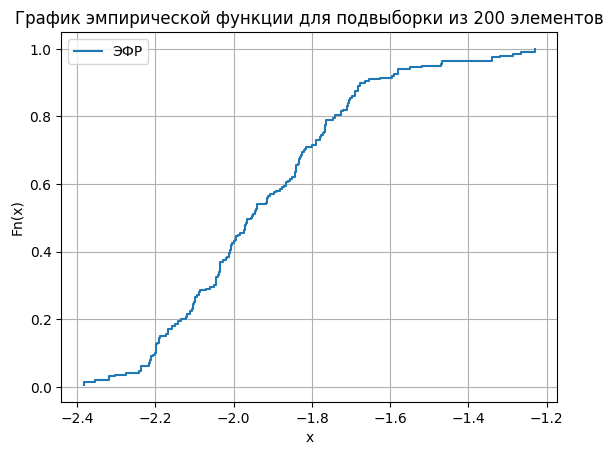

In [6]:
#Построение эмпирических функций распределения для случайных подвыборок из 10, 100, 200 элементов
for size in [10, 100, 200]:
    build_edf(nakagami, size)

In [7]:
def build_hist(sample, size):
    """построение гистограммы для подвыборки из size элементов"""
    values = np.random.choice(sample, size=size)
    data_sorted = np.sort(values)
    plt.hist(data_sorted, bins='auto', edgecolor='black')
    plt.title(f'Гистограмма для подвыборки из {size} элементов')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.show()

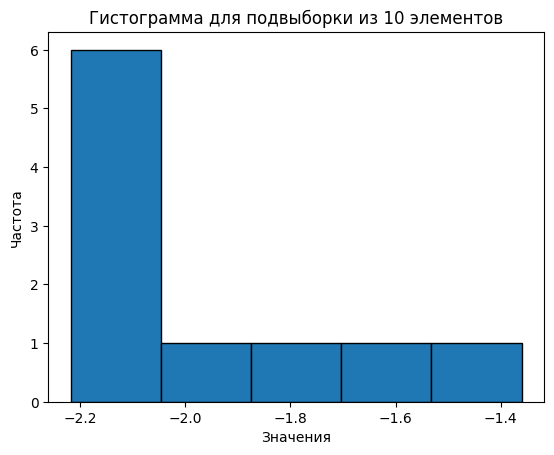

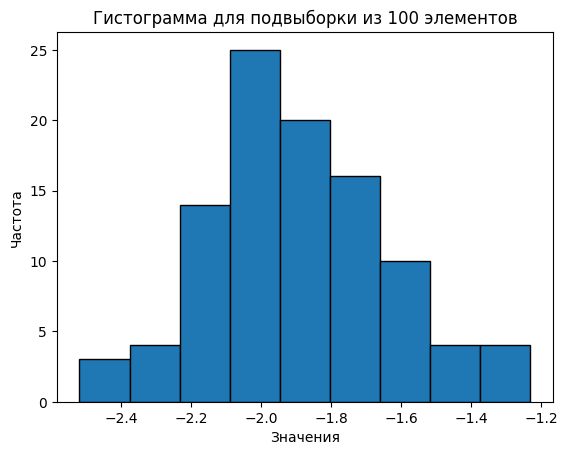

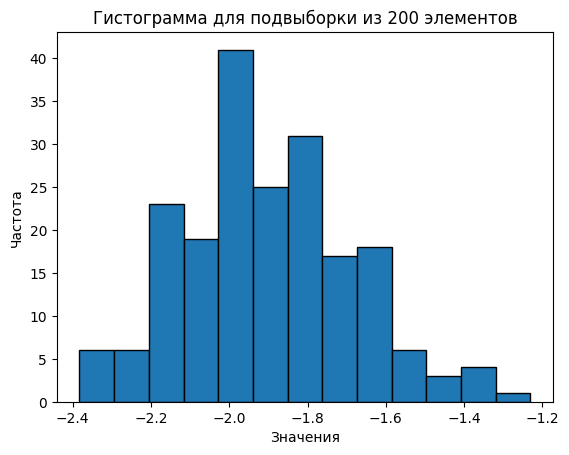

In [8]:
#Построение гистограмм для случайных подвыборок из 10, 100, 200 элементов
for size in [10, 100, 200]:
    build_hist(nakagami, size)

In [9]:
def nakagami_cdf(x, nu, loc):
    return gammainc(nu, (nu / loc) * x**2)

def build_nakagami_cdf(nu, loc):
    x = np.linspace(0,3)
    y = nakagami_cdf(x, nu, loc)
    #plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=f'μ={nu}, ω={loc}')
    plt.title('Распределение Накагами')
    plt.xlabel('Значение')
    plt.ylabel('Вероятность')
    plt.legend()
    plt.grid(True)
    plt.show()

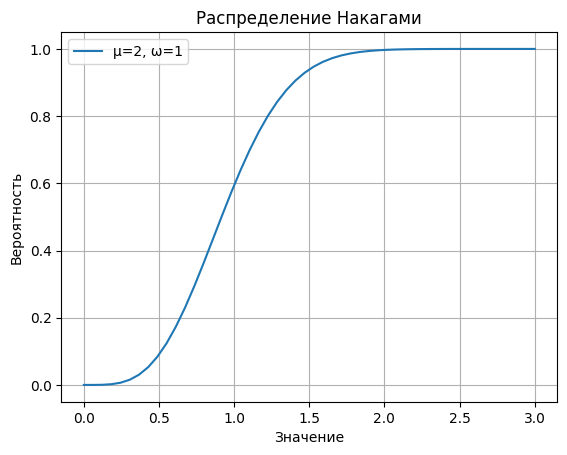

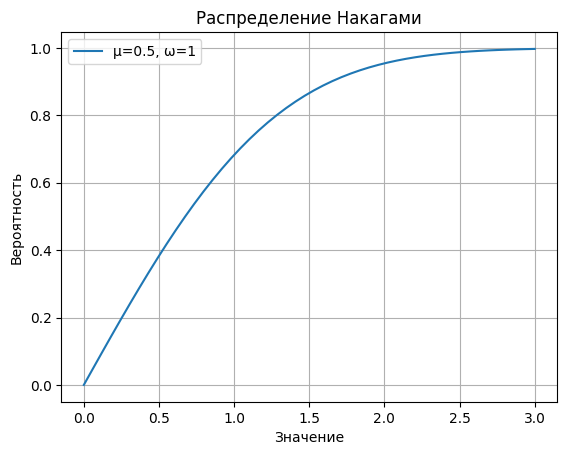

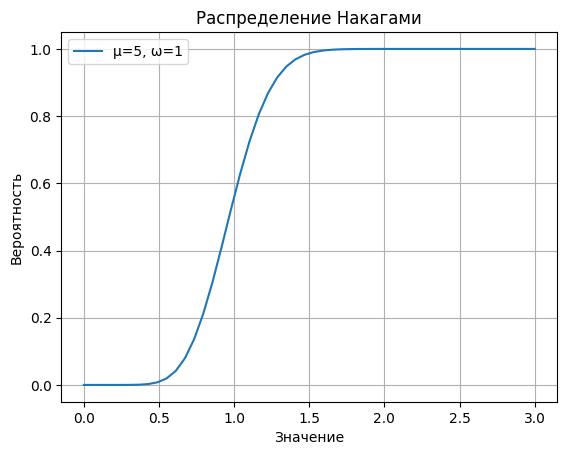

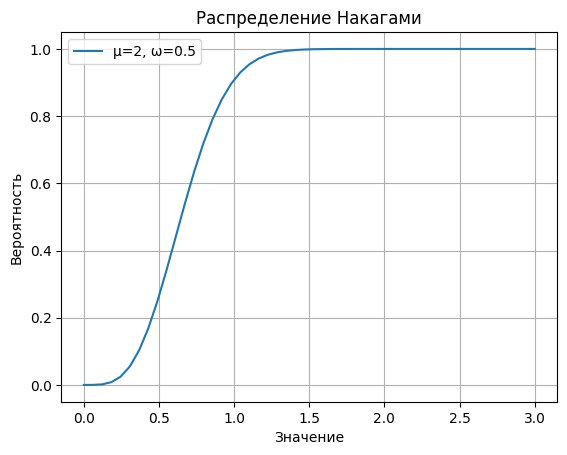

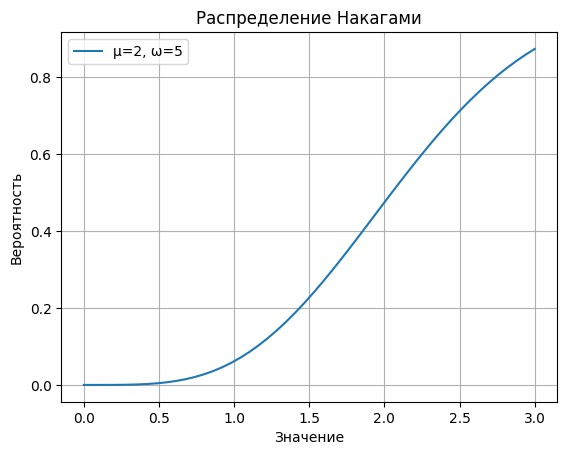

In [10]:
# Пример с случайными параметрами
build_nakagami_cdf(nu=2, loc=1)

# Изменение параметра m
build_nakagami_cdf(nu=0.5, loc=1)
build_nakagami_cdf(nu=5, loc=1)

# Изменение параметра Omega
build_nakagami_cdf(nu=2, loc=0.5)
build_nakagami_cdf(nu=2, loc=5)